#Ambiente e bibliotecas

In [4]:
import sys, platform
import numpy as np, pandas as pd, sklearn, matplotlib as plt, seaborn as sns
print("Python:", sys.version)
print("Platform:", platform.platform())
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", plt.__version__)
print("seaborn:", sns.__version__)


Python: 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
Platform: Windows-10-10.0.26200-SP0
numpy: 2.3.4
pandas: 2.3.3
scikit-learn: 1.7.2
matplotlib: 3.10.7
seaborn: 0.13.2


#Parte 2 Escolha de base de dados
#Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da #clusterização.

In [5]:
import kagglehub
import pandas as pd
import shutil
import os

# Baixa a última versão do dataset no cache do kagglehub
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Dataset baixado em:", path)

# Cria a pasta "data" no seu projeto, se ainda não existir
os.makedirs("data", exist_ok=True)

# Localiza o arquivo CSV dentro da pasta baixada e copia para "data/"
src_file = os.path.join(path, "Country-data.csv")  # nome do arquivo original no Kaggle
dst_file = os.path.join("data", "country-data.csv")

# Copia o arquivo para dentro da pasta data
shutil.copy(src_file, dst_file)
print(f"Arquivo copiado para: {dst_file}")


Dataset baixado em: C:\Users\ljcun\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2
Arquivo copiado para: data\country-data.csv


#Carregar dados + Checagens

In [6]:
import pandas as pd
df = pd.read_csv("data/country-data.csv")
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#Quantos países existem no dataset?

In [11]:
print(df['country'].nunique())

167


#Faixa dinâmica das variáveis e o que fazer antes da clusterização

In [13]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number').columns
display(df[num_cols].describe())

# for c in num_cols:
#     df[c].hist(bins=30); plt.title(f"Histograma: {c}"); plt.show()
#     df.boxplot(column=c); plt.title(f"Boxplot: {c}"); plt.show()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


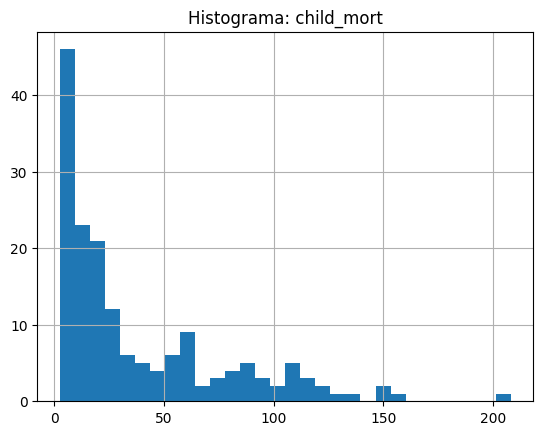

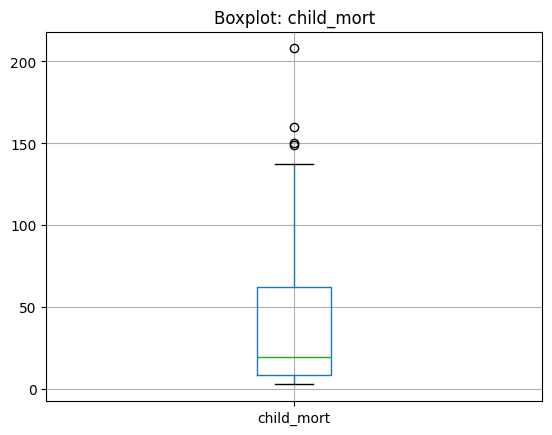

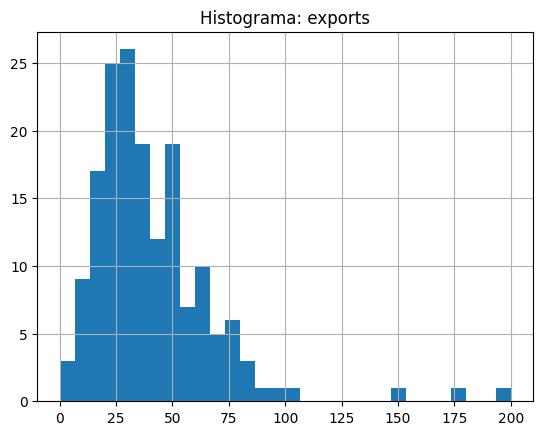

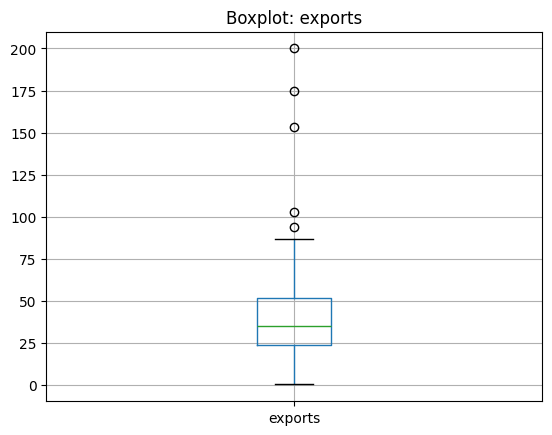

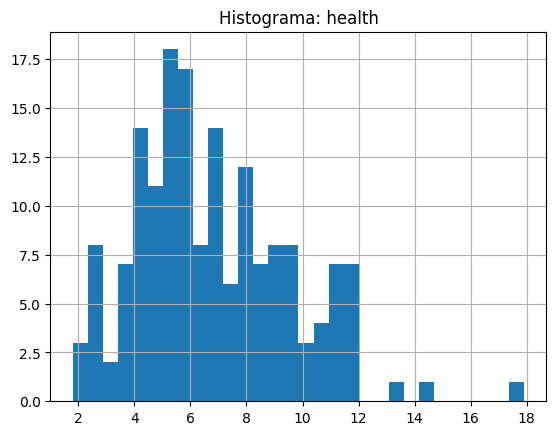

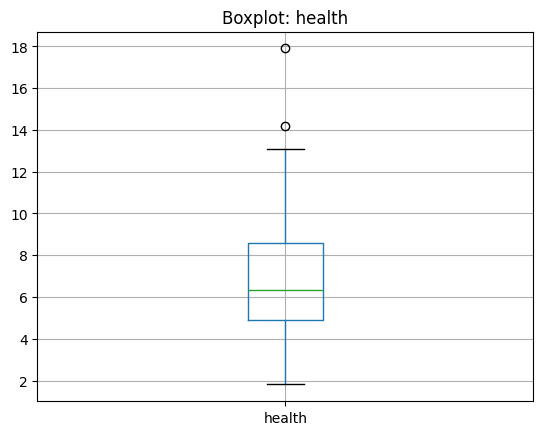

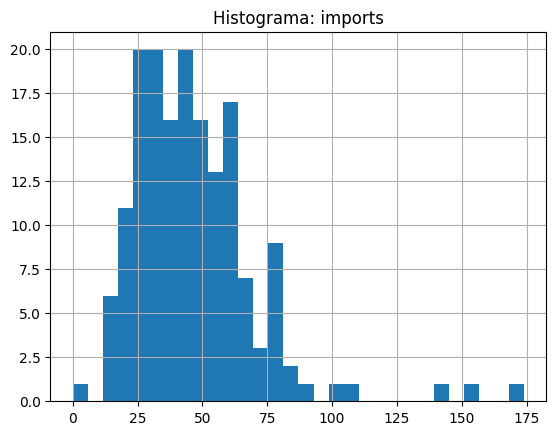

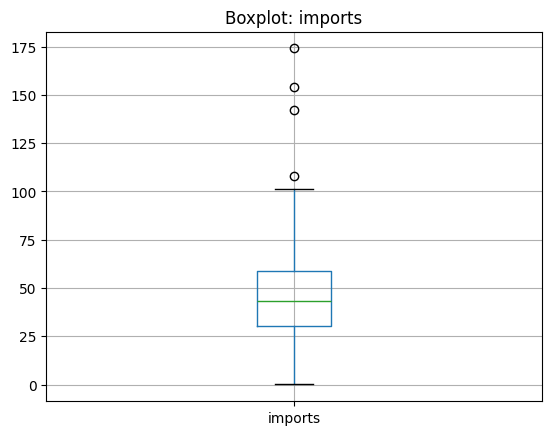

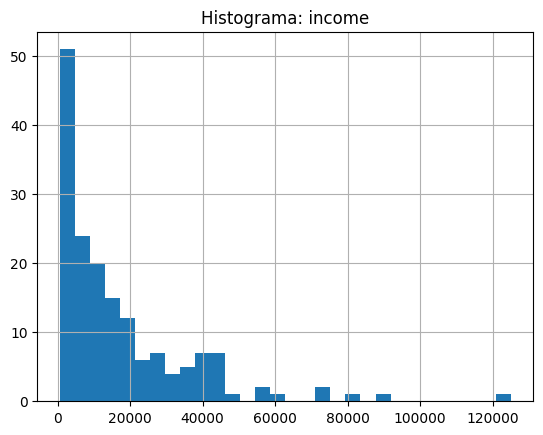

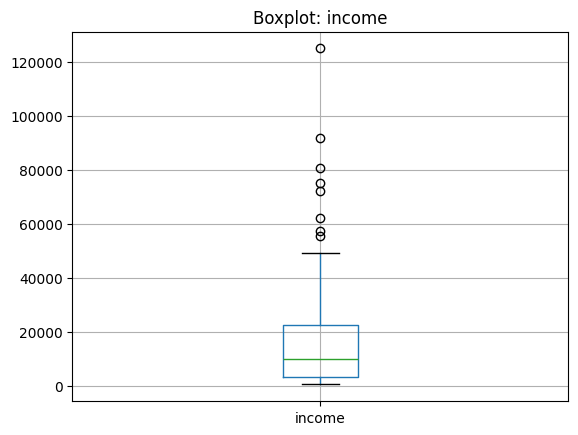

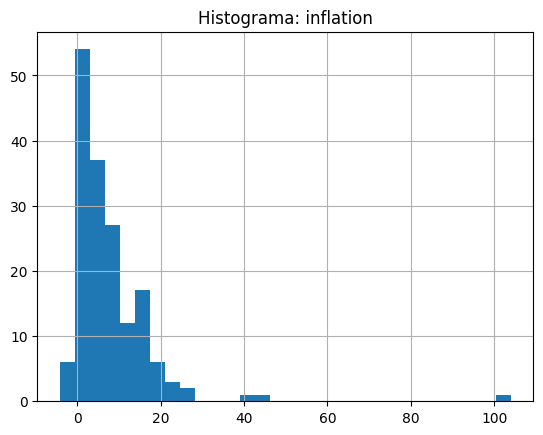

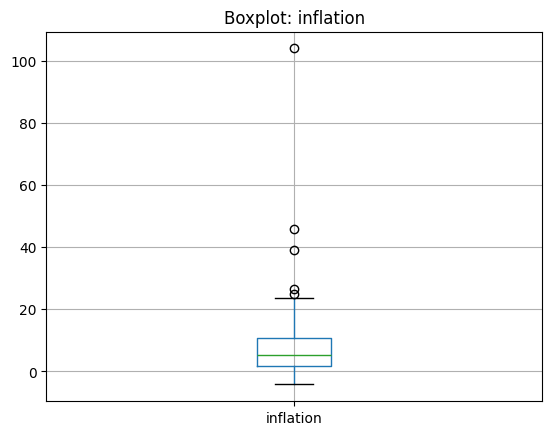

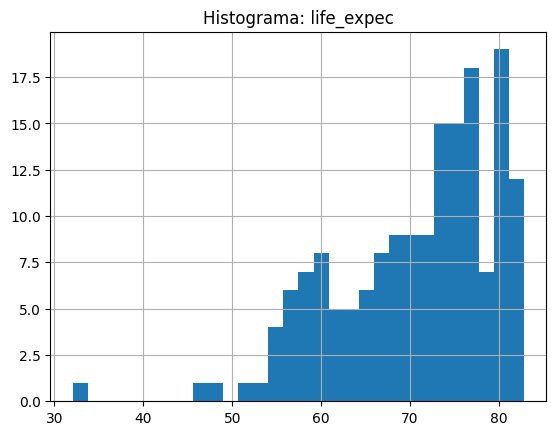

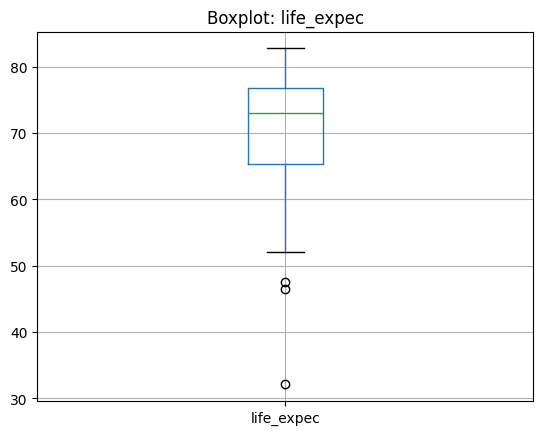

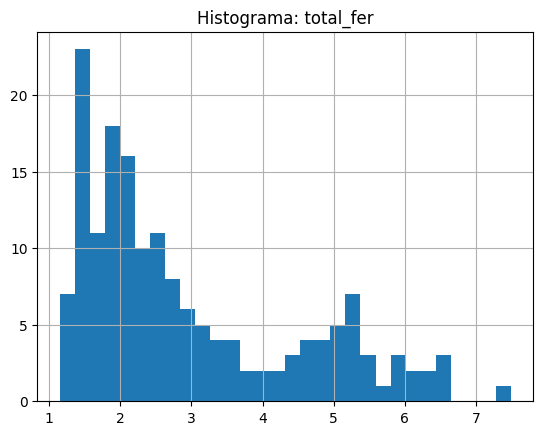

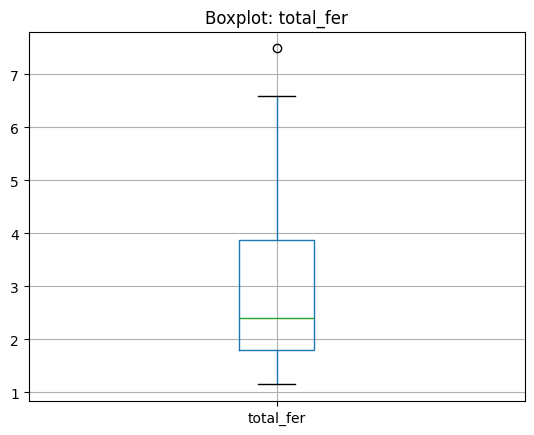

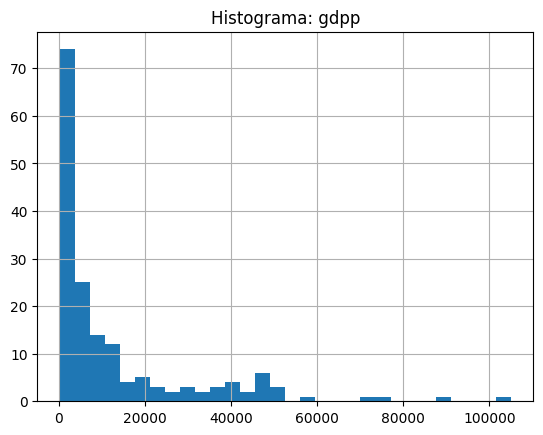

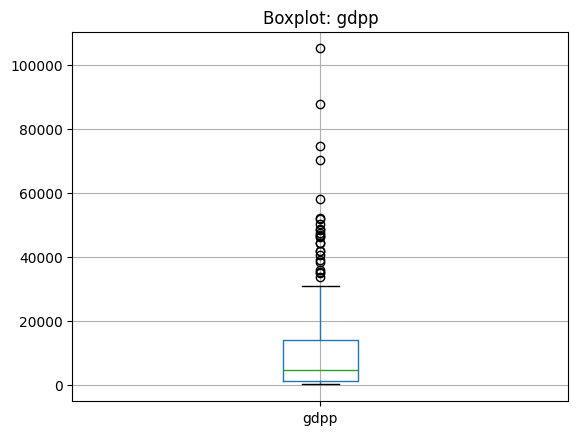

In [14]:
for c in num_cols:
    df[c].hist(bins=30); plt.title(f"Histograma: {c}"); plt.show()
    df.boxplot(column=c); plt.title(f"Boxplot: {c}"); plt.show()

#Realize o Pré-processamento adequado dos dados

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

X = df.drop(columns=['country']) if 'country' in df.columns else df.copy()
positivas = [c for c in X.columns if (X[c].min() > 0)]

preprocess = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one')),
    ('scaler', StandardScaler())
])

X_pp = preprocess.fit_transform(X)
X_pp[:3]


c:\Users\ljcun\anaconda3\envs\infnet_cluster_env\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:390: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


array([[ 1.27801205, -1.7643134 ,  0.43464558,  0.14786752, -1.41303458,
         0.56570749, -1.58159894,  1.73481749, -1.46030093],
       [-0.23970754, -0.28387175,  0.07648044,  0.29183453,  0.07165967,
        -0.04848547,  0.63084985, -0.94433634, -0.12283509],
       [ 0.19846398,  0.18416071, -0.98405604, -0.49894589,  0.2852398 ,
         1.03724306,  0.64983413,  0.14356389, -0.06491589]])